In [ ]:
!git clone https://github.com/adeelahmad-co/emotion_recognition.git
%cd emotion_recognition

Cloning into 'emotion_recognition'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
/content/emotion_recognition


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

mode = "display"

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


def emotion_recog(frame):
    model.load_weights('model.h5')

    # prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
    emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    # frame = cv2.imread("image1.jpg")
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # cv2_imshow(frame)
    return frame


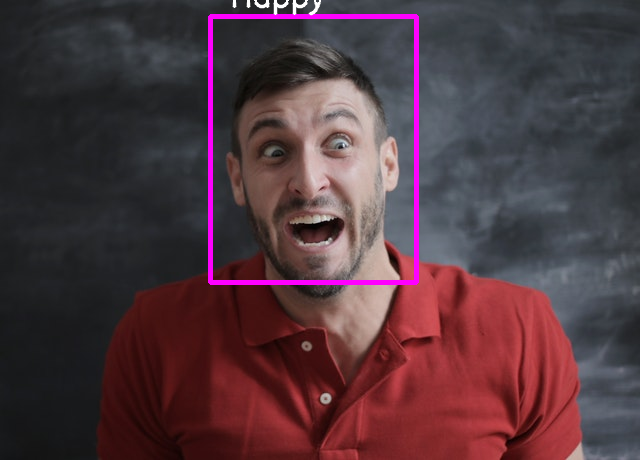

In [ ]:
input = cv2.imread("image1.jpg")
output = emotion_recog(input)
cv2_imshow(output)

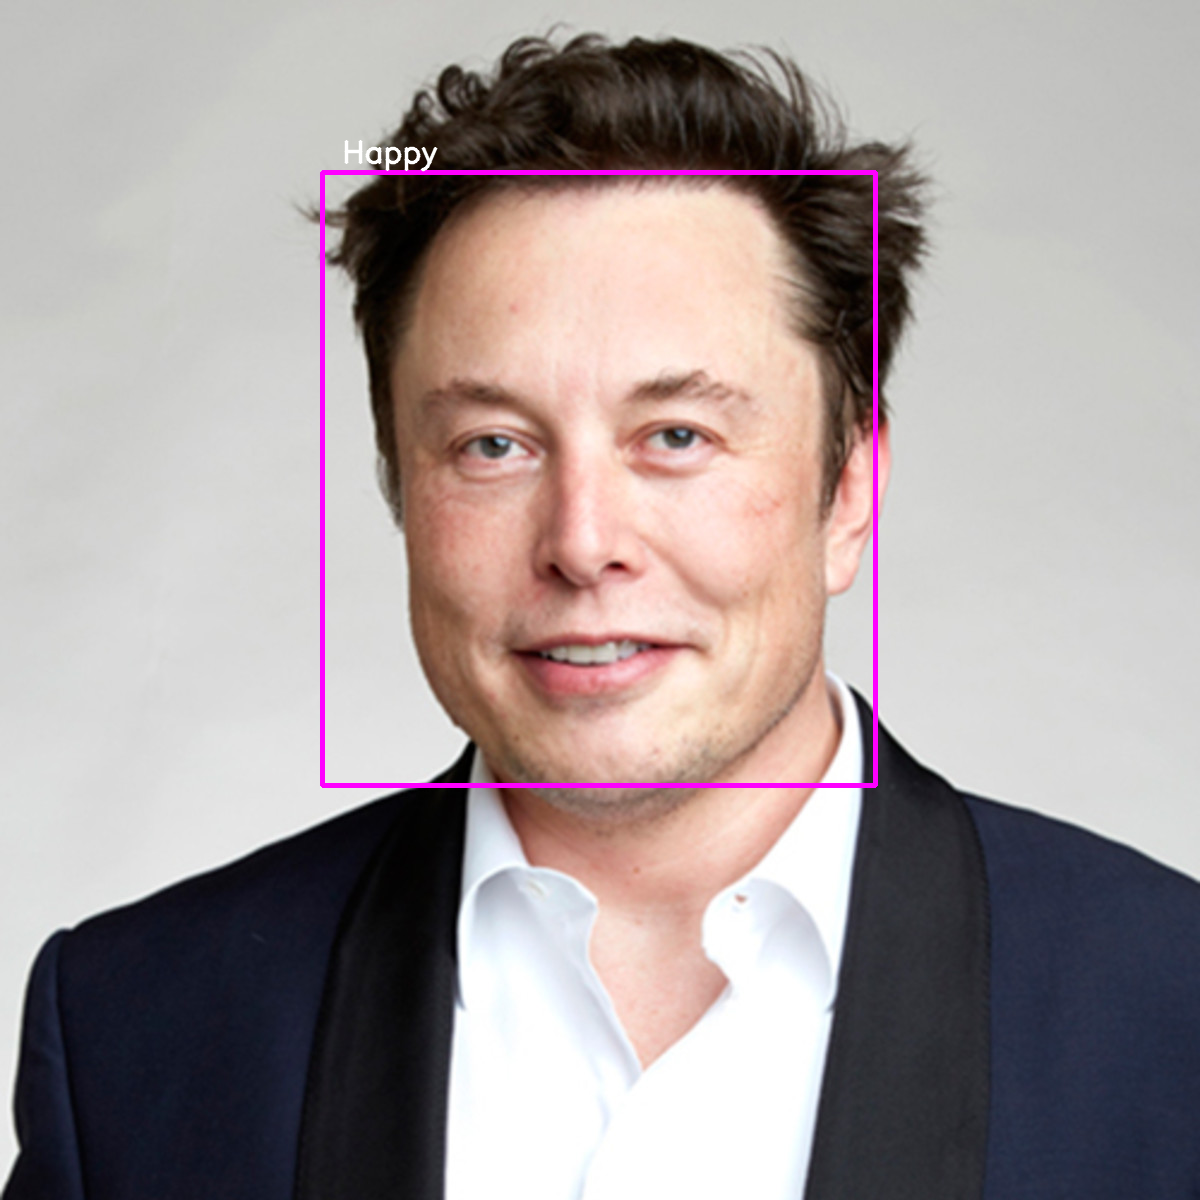

In [ ]:
input = cv2.imread("elon.jpg")
output = emotion_recog(input)
cv2_imshow(output)

In [ ]:
input = cv2.imread("sad.jpg")
output = emotion_recog(input)
cv2_imshow(output)

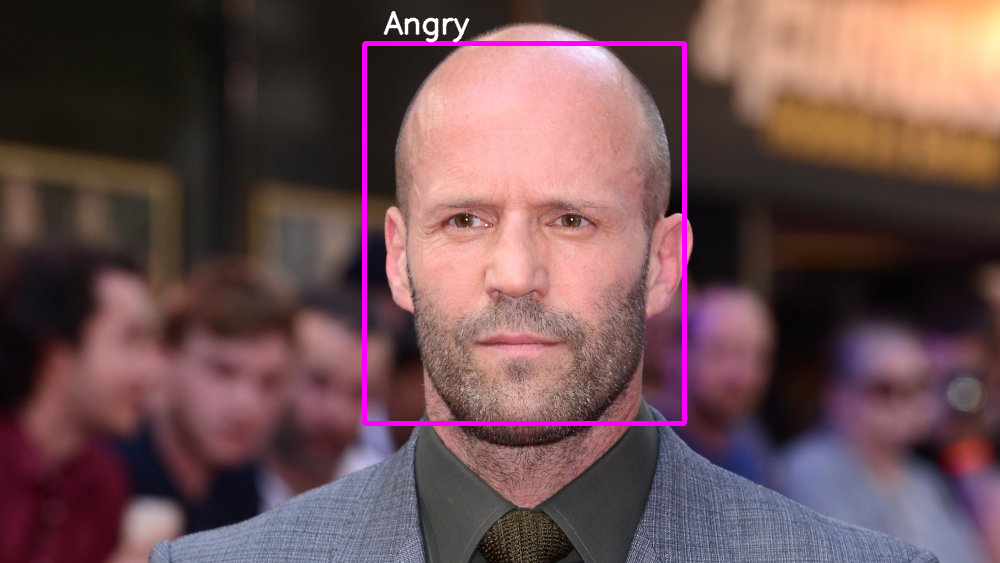

In [ ]:
input = cv2.imread("jason.jpg")
output = emotion_recog(input)
cv2_imshow(output)

In [ ]:
input = cv2.imread("image2.jpg")
output = emotion_recog(input)
cv2_imshow(output)

In [ ]:
import cv2
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = emotion_recog(frame)
  out.write(output)
out.release()
print("Done processing video")

In [ ]:
import io
import base64
from google.colab.output import eval_js
from IPython.display import display, Javascript


def prepare_webcam():
  display(
    Javascript('''
      var div = null;
      var video;
      var stream;
      var imgElement;
      var captureCanvas;
      var pendingResolve = null;
      
      async function onAnimationFrame() {
        window.requestAnimationFrame(onAnimationFrame);
      
        if (pendingResolve) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          var result = captureCanvas.toDataURL('image/jpeg', 0.8);

          var lp = pendingResolve;
          pendingResolve = null;
          lp(result);
        }
      }
      
      async function initWebCam() {
        div = document.createElement('div');
        document.body.appendChild(div);
            
        video = document.createElement('video');
        video.style.display = 'inline-block';
        stream = await navigator.mediaDevices.getUserMedia(
            {video: { facingMode: "environment"}});
        div.appendChild(video);

        imgElement = document.createElement('img');
        imgElement.style.display = 'inline-block';
        div.appendChild(imgElement);
        
        video.srcObject = stream;
        await video.play();

        captureCanvas = document.createElement('canvas');
        captureCanvas.width = 640;
        captureCanvas.height = 480;
        window.requestAnimationFrame(onAnimationFrame);
        
        return stream;
      }

      async function processFrame(fgFrame) {
        if (div == null) {
          stream = await initWebCam();
        }

        if (fgFrame != "") {
          var videoRect = video.getClientRects()[0];
          imgElement.style.top = videoRect.top + "px";
          imgElement.style.left = videoRect.left + "px";
          imgElement.style.width = videoRect.width + "px";
          imgElement.style.height = videoRect.height + "px";
          imgElement.src = fgFrame;
        }

        return await new Promise(
          function(resolve, reject) {pendingResolve = resolve;});
      }
    ''')
  )
    
def process_frame(fg_frame):
  return eval_js('processFrame("{}")'.format(fg_frame))


In [ ]:
import io
import PIL
import numpy as np


def emotion_recog(frame):
    model.load_weights('model.h5')

    # prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
    emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    # frame = cv2.imread("image1.jpg")
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # cv2_imshow(frame)
    return frame

def webcam(im_frame):
  im_bytes = base64.b64decode(im_frame.split(',')[1])
  im_PIL = PIL.Image.open(io.BytesIO(im_bytes))
  im_np = np.asarray(im_PIL)

  fg_np = emotion_recog(im_np)
  fg_PIL = PIL.Image.fromarray(np.uint8(fg_np))

  io_buffer = io.BytesIO()
  fg_PIL.save(io_buffer, format='jpeg')
  fg_frame = 'data:image/jpeg;base64,{}'.format(
      (str(base64.b64encode(io_buffer.getvalue()), 'utf-8')))
  return fg_frame

In [ ]:
# prepare WebCam
prepare_webcam()

# main loop
fg_frame = ''
while True:
  # show the processed frame and capture a new frame
  # TODO: this step is very slow!
  frame = process_frame(fg_frame)
  # matting by MODNet
  # NOTE: matting inference is fast
  fg_frame = webcam(frame)